# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

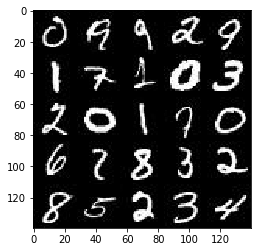

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

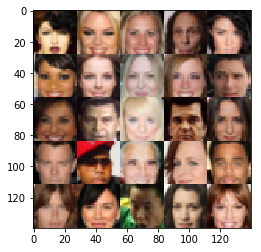

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    
    #1. Real input images placeholder with rank 4 using image_width, image_height, and image_channels.
    input_real = tf.placeholder(tf.float32, [None, image_width,\
                                             image_height,\
                                             image_channels],\
                                             name = "input_real")
    
    
    
    #2. Z input placeholder with rank 2 using z_dim.
    input_z = tf.placeholder(tf.float32, [None, z_dim],\
                                       name = "input_z")
    
    
    #3. Learning rate placeholder with rank 0.
    learning_rate = tf.placeholder(tf.float32, None,\
                                   name = "learning_rate")

    
    return input_real, input_z, learning_rate
    
  

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha= 0.1
    sdev= 0.02
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # input layer with image size(28*28*3)
        x1 = tf.layers.conv2d(images, 32, 5, 2,\
                        padding='same',\
                        kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        lrelu1 = tf.maximum(alpha * x1, x1)
        # Layer 1 out: 14x14x32
        
        
        
        # Layer 2: 14x14x32
        x2 = tf.layers.conv2d(lrelu1, 64, 5, 2,\
                        padding='same',\
                        kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        # Layer 2 out: 7x7x64
        
        
        
        x3 = tf.layers.conv2d(lrelu2, 128, 5, 2,\
                        padding='same',\
                        kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        # Layer 3 out: 4x4x128
        
        
        
        x4 = tf.layers.conv2d(lrelu3, 256, 5, 2,\
                        padding='same',\
                        kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn4 = tf.layers.batch_normalization(x4, training=True)
        lrelu4 = tf.maximum(alpha * bn4, bn4)
        # Layer 4 out: 2x2x256
        
        
        
        flattened = tf.reshape(lrelu4, (-1, 2*2*256))
        logits = tf.layers.dense(flattened, 1,\
                            kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        output = tf.sigmoid(logits)
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [9]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    sdev = 0.02
    # variable scope for generator
    with tf.variable_scope('generator', reuse=not is_train):
        #fake with fully connected
        
        # Layer 1 in: 7x7x256
        x1 = tf.layers.dense(z, 4 * 4 * 512)
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        lrelu1 = tf.maximum(alpha * x1, x1)
        # Layer 1 out: 4x4x512
        
        
        x2 = tf.layers.conv2d_transpose(lrelu1, 128, 4, 1,\
                                padding='valid',\
                                kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        lrelu2 = tf.maximum(alpha * bn2, bn2)
        # Layer 2 out: 8x8x128
        
        
        x3 = tf.layers.conv2d_transpose(lrelu2, 64, 5, 2,\
                                padding='same', \
                                kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        lrelu3 = tf.maximum(alpha * bn3, bn3)
        # Layer 3 out: 16x16x64
        
        
        
        x4 = tf.layers.conv2d_transpose(lrelu3, 32, 5, 2,\
                                padding='same',\
                                kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        bn4 = tf.layers.batch_normalization(x4, training=is_train)
        lrelu4 = tf.maximum(alpha * bn4, bn4)
        # Layer 4 out: 32x32x32
        
        
        
        logits = tf.layers.conv2d_transpose(lrelu4, out_channel_dim, 3, 1,\
                                    padding='same',\
                                    kernel_initializer=tf.random_normal_initializer(stddev=sdev))
        output = tf.tanh(logits)
        
        
        return output
    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,\
                                                labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,\
                                                labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,\
                                                labels=tf.ones_like(d_model_fake)))
    
    

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    
    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate,\
                                    beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate,\
                                    beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt




"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images,\
                                               input_z: batch_z,\
                                               learn_rate: learning_rate})
                
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,\
                                               input_z: batch_z,\
                                               learn_rate: learning_rate})

                
                
                
                # show_generator_output to show generator output
                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                    
                    
                    

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 0.1132... Generator Loss: 3.8164


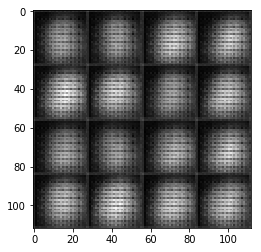

Epoch 0/2... Discriminator Loss: 0.4083... Generator Loss: 1.6668
Epoch 0/2... Discriminator Loss: 0.2134... Generator Loss: 2.3080


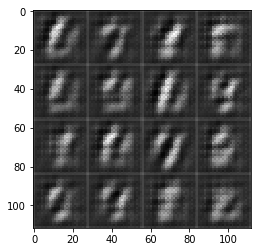

Epoch 0/2... Discriminator Loss: 0.8935... Generator Loss: 0.7820
Epoch 0/2... Discriminator Loss: 0.9974... Generator Loss: 0.9753


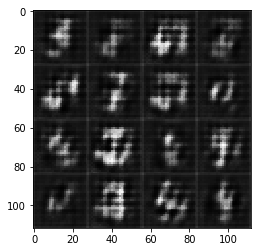

Epoch 0/2... Discriminator Loss: 1.4598... Generator Loss: 0.4637
Epoch 0/2... Discriminator Loss: 1.0837... Generator Loss: 0.9862


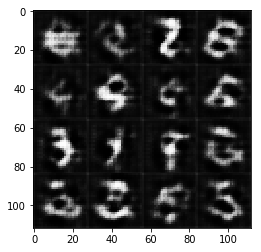

Epoch 0/2... Discriminator Loss: 1.0771... Generator Loss: 1.2634
Epoch 0/2... Discriminator Loss: 1.5585... Generator Loss: 0.3205


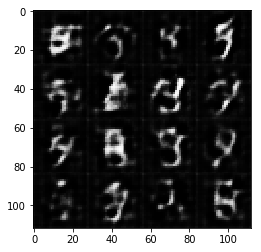

Epoch 0/2... Discriminator Loss: 1.0825... Generator Loss: 0.6745
Epoch 0/2... Discriminator Loss: 0.9129... Generator Loss: 1.0191


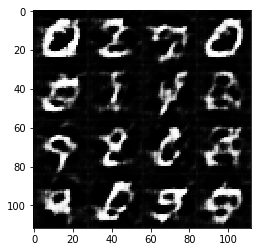

Epoch 0/2... Discriminator Loss: 0.9434... Generator Loss: 0.8767
Epoch 0/2... Discriminator Loss: 0.9463... Generator Loss: 0.9866


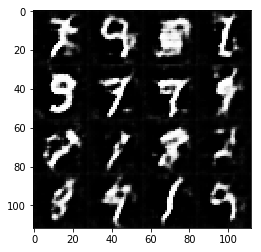

Epoch 0/2... Discriminator Loss: 1.1447... Generator Loss: 0.6476
Epoch 0/2... Discriminator Loss: 1.3758... Generator Loss: 0.4319


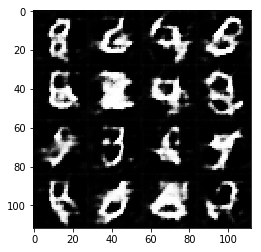

Epoch 0/2... Discriminator Loss: 0.9714... Generator Loss: 0.6623
Epoch 0/2... Discriminator Loss: 1.5291... Generator Loss: 0.3816


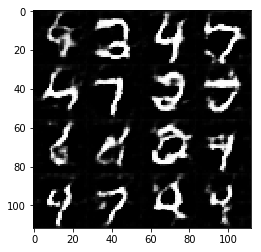

Epoch 0/2... Discriminator Loss: 1.3693... Generator Loss: 2.0586
Epoch 0/2... Discriminator Loss: 1.7561... Generator Loss: 0.2967


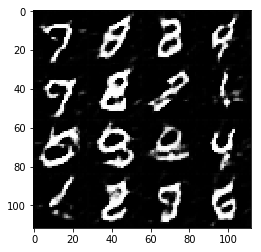

Epoch 0/2... Discriminator Loss: 1.5004... Generator Loss: 0.3576
Epoch 0/2... Discriminator Loss: 0.7120... Generator Loss: 1.2979


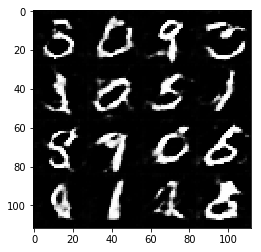

Epoch 0/2... Discriminator Loss: 0.8413... Generator Loss: 1.0782
Epoch 0/2... Discriminator Loss: 1.1858... Generator Loss: 0.5920


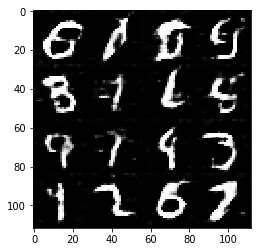

Epoch 0/2... Discriminator Loss: 1.0060... Generator Loss: 0.6120
Epoch 0/2... Discriminator Loss: 1.2757... Generator Loss: 0.4474


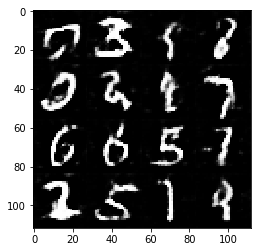

Epoch 0/2... Discriminator Loss: 1.5774... Generator Loss: 0.3005
Epoch 0/2... Discriminator Loss: 1.2721... Generator Loss: 0.4242


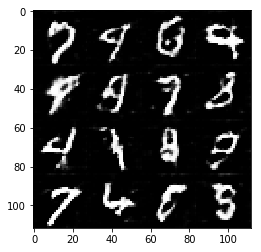

Epoch 0/2... Discriminator Loss: 1.0972... Generator Loss: 0.5191
Epoch 0/2... Discriminator Loss: 0.8444... Generator Loss: 1.2999


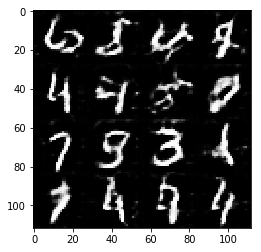

Epoch 0/2... Discriminator Loss: 0.8549... Generator Loss: 0.9284
Epoch 0/2... Discriminator Loss: 0.8498... Generator Loss: 0.9417


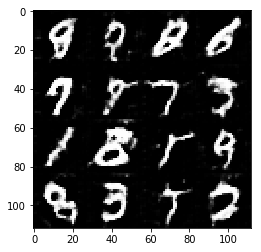

Epoch 0/2... Discriminator Loss: 0.6521... Generator Loss: 1.2973
Epoch 0/2... Discriminator Loss: 0.9847... Generator Loss: 0.6543


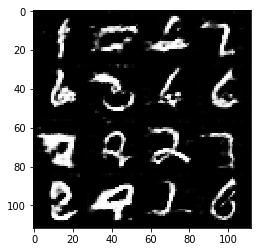

Epoch 0/2... Discriminator Loss: 1.2542... Generator Loss: 0.4832
Epoch 0/2... Discriminator Loss: 0.9244... Generator Loss: 1.4905


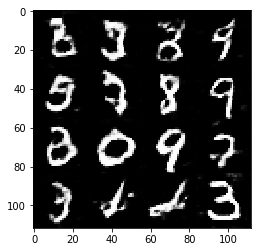

Epoch 0/2... Discriminator Loss: 1.0157... Generator Loss: 0.5582
Epoch 0/2... Discriminator Loss: 0.5705... Generator Loss: 1.7848


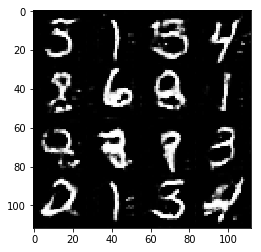

Epoch 1/2... Discriminator Loss: 1.0804... Generator Loss: 0.7368
Epoch 1/2... Discriminator Loss: 1.3714... Generator Loss: 2.7104


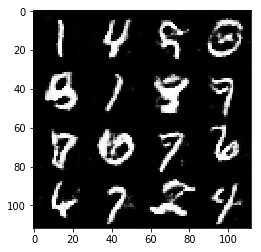

Epoch 1/2... Discriminator Loss: 0.7393... Generator Loss: 1.0792
Epoch 1/2... Discriminator Loss: 0.8901... Generator Loss: 0.9193


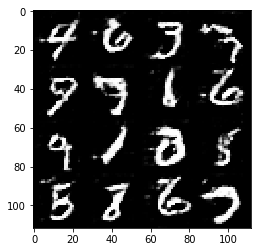

Epoch 1/2... Discriminator Loss: 1.3041... Generator Loss: 0.4482
Epoch 1/2... Discriminator Loss: 1.0246... Generator Loss: 1.6754


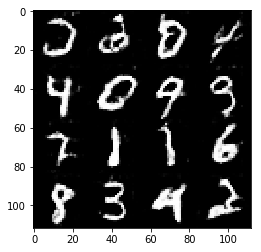

Epoch 1/2... Discriminator Loss: 1.4366... Generator Loss: 0.4005
Epoch 1/2... Discriminator Loss: 0.7496... Generator Loss: 0.9064


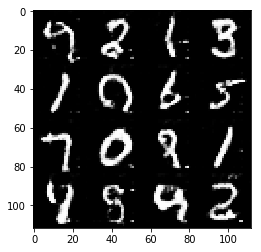

Epoch 1/2... Discriminator Loss: 1.0066... Generator Loss: 0.6571
Epoch 1/2... Discriminator Loss: 0.6344... Generator Loss: 1.0048


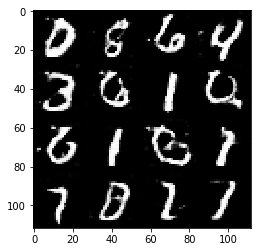

Epoch 1/2... Discriminator Loss: 0.9111... Generator Loss: 1.4843
Epoch 1/2... Discriminator Loss: 0.8954... Generator Loss: 1.0413


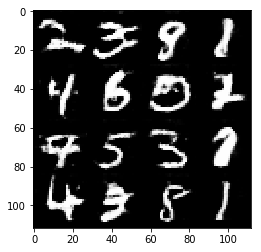

Epoch 1/2... Discriminator Loss: 2.1049... Generator Loss: 0.1755
Epoch 1/2... Discriminator Loss: 1.0708... Generator Loss: 0.5250


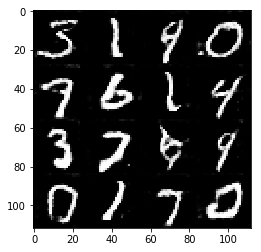

Epoch 1/2... Discriminator Loss: 1.4498... Generator Loss: 0.3438
Epoch 1/2... Discriminator Loss: 0.8951... Generator Loss: 0.7148


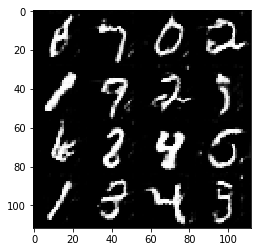

Epoch 1/2... Discriminator Loss: 0.9677... Generator Loss: 0.6380
Epoch 1/2... Discriminator Loss: 2.0528... Generator Loss: 0.1594


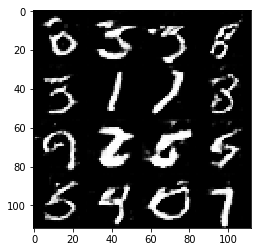

Epoch 1/2... Discriminator Loss: 0.5354... Generator Loss: 1.1890
Epoch 1/2... Discriminator Loss: 1.5721... Generator Loss: 0.5104


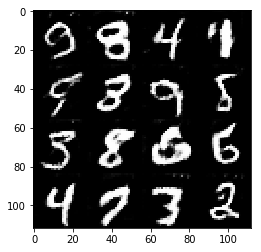

Epoch 1/2... Discriminator Loss: 0.7788... Generator Loss: 0.9999
Epoch 1/2... Discriminator Loss: 0.8880... Generator Loss: 0.6436


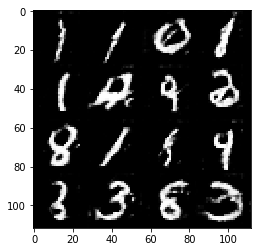

Epoch 1/2... Discriminator Loss: 0.6986... Generator Loss: 1.4282
Epoch 1/2... Discriminator Loss: 1.2309... Generator Loss: 0.4484


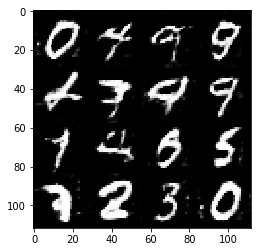

Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 0.6155
Epoch 1/2... Discriminator Loss: 3.1573... Generator Loss: 3.8849


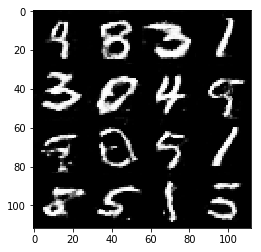

Epoch 1/2... Discriminator Loss: 0.8739... Generator Loss: 0.6847
Epoch 1/2... Discriminator Loss: 1.7689... Generator Loss: 0.2244


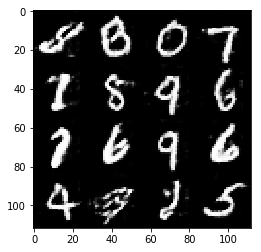

Epoch 1/2... Discriminator Loss: 0.8876... Generator Loss: 0.7815
Epoch 1/2... Discriminator Loss: 1.1661... Generator Loss: 0.4628


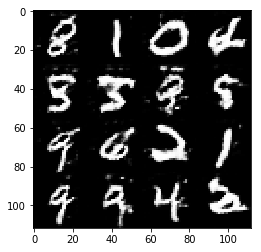

Epoch 1/2... Discriminator Loss: 1.5133... Generator Loss: 0.3179
Epoch 1/2... Discriminator Loss: 0.6079... Generator Loss: 1.3311


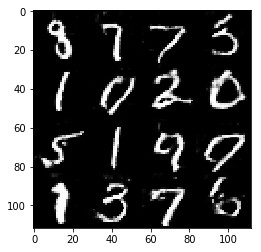

Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 1.5858
Epoch 1/2... Discriminator Loss: 0.7321... Generator Loss: 0.8564


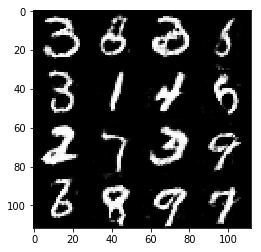

Epoch 1/2... Discriminator Loss: 1.2747... Generator Loss: 0.4073
Epoch 1/2... Discriminator Loss: 1.3412... Generator Loss: 0.3678


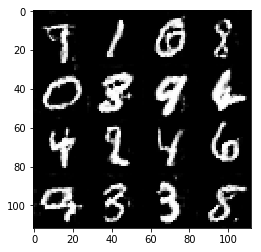

Epoch 1/2... Discriminator Loss: 0.8914... Generator Loss: 0.7424


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.6341... Generator Loss: 1.5425


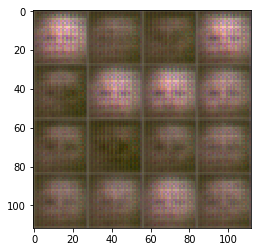

Epoch 0/1... Discriminator Loss: 1.0661... Generator Loss: 1.4051
Epoch 0/1... Discriminator Loss: 1.4774... Generator Loss: 0.4814


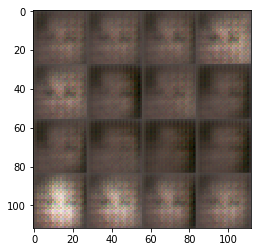

Epoch 0/1... Discriminator Loss: 0.5296... Generator Loss: 2.0486
Epoch 0/1... Discriminator Loss: 0.4144... Generator Loss: 1.7049


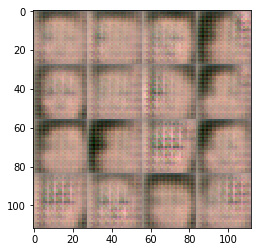

Epoch 0/1... Discriminator Loss: 0.8953... Generator Loss: 1.3714
Epoch 0/1... Discriminator Loss: 1.2676... Generator Loss: 2.1938


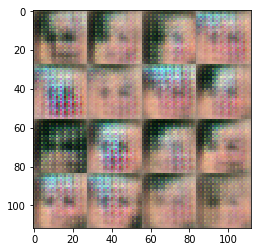

Epoch 0/1... Discriminator Loss: 0.6703... Generator Loss: 1.9268
Epoch 0/1... Discriminator Loss: 1.3622... Generator Loss: 0.9100


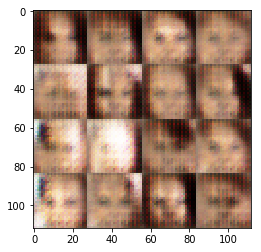

Epoch 0/1... Discriminator Loss: 0.8473... Generator Loss: 1.2377
Epoch 0/1... Discriminator Loss: 0.7923... Generator Loss: 1.3153


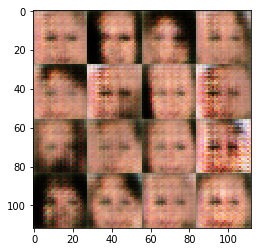

Epoch 0/1... Discriminator Loss: 2.3745... Generator Loss: 3.9981
Epoch 0/1... Discriminator Loss: 1.3498... Generator Loss: 0.9091


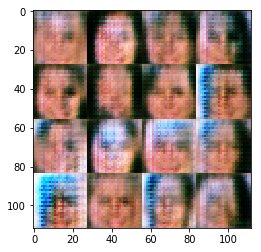

Epoch 0/1... Discriminator Loss: 0.9757... Generator Loss: 1.3260
Epoch 0/1... Discriminator Loss: 0.9970... Generator Loss: 0.8662


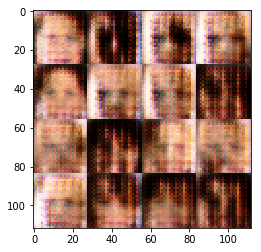

Epoch 0/1... Discriminator Loss: 1.2872... Generator Loss: 0.7643
Epoch 0/1... Discriminator Loss: 0.9423... Generator Loss: 1.0006


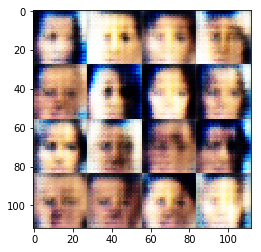

Epoch 0/1... Discriminator Loss: 0.6227... Generator Loss: 1.2088
Epoch 0/1... Discriminator Loss: 0.5900... Generator Loss: 1.5671


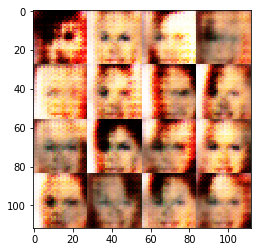

Epoch 0/1... Discriminator Loss: 1.0243... Generator Loss: 0.9068
Epoch 0/1... Discriminator Loss: 1.5452... Generator Loss: 0.3467


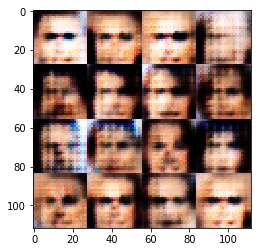

Epoch 0/1... Discriminator Loss: 0.9187... Generator Loss: 1.3025
Epoch 0/1... Discriminator Loss: 0.9896... Generator Loss: 0.9055


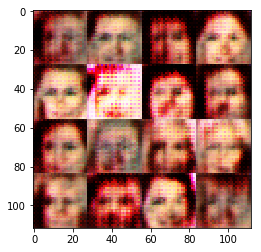

Epoch 0/1... Discriminator Loss: 0.9112... Generator Loss: 1.2679
Epoch 0/1... Discriminator Loss: 1.0865... Generator Loss: 1.3766


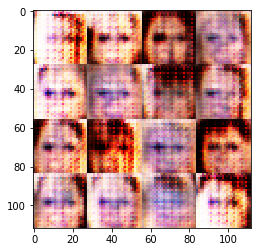

Epoch 0/1... Discriminator Loss: 1.0086... Generator Loss: 0.7582
Epoch 0/1... Discriminator Loss: 0.8523... Generator Loss: 1.3466


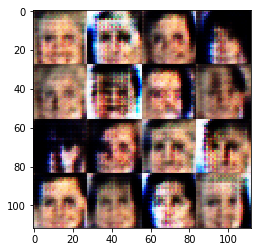

Epoch 0/1... Discriminator Loss: 0.7004... Generator Loss: 1.6204
Epoch 0/1... Discriminator Loss: 1.1147... Generator Loss: 1.0215


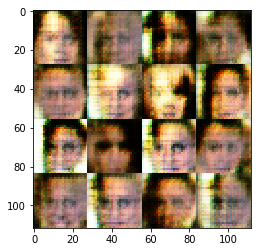

Epoch 0/1... Discriminator Loss: 0.9817... Generator Loss: 0.9707
Epoch 0/1... Discriminator Loss: 0.8524... Generator Loss: 0.7910


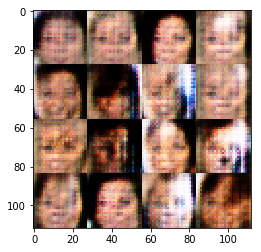

Epoch 0/1... Discriminator Loss: 1.3500... Generator Loss: 0.6876
Epoch 0/1... Discriminator Loss: 1.1861... Generator Loss: 0.7478


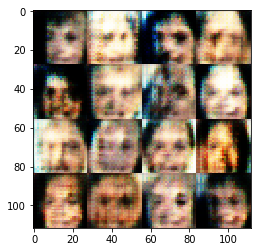

Epoch 0/1... Discriminator Loss: 1.4163... Generator Loss: 0.4300
Epoch 0/1... Discriminator Loss: 1.3214... Generator Loss: 0.6985


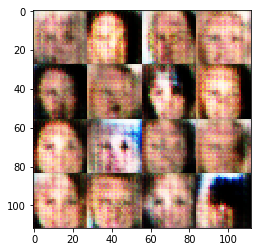

Epoch 0/1... Discriminator Loss: 1.6581... Generator Loss: 0.3179
Epoch 0/1... Discriminator Loss: 0.8624... Generator Loss: 2.0154


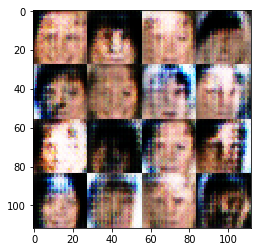

Epoch 0/1... Discriminator Loss: 0.7325... Generator Loss: 1.5246
Epoch 0/1... Discriminator Loss: 1.3200... Generator Loss: 0.4783


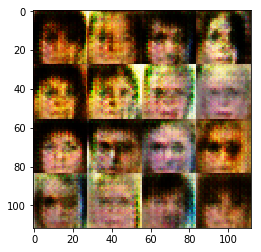

Epoch 0/1... Discriminator Loss: 0.9317... Generator Loss: 0.8402
Epoch 0/1... Discriminator Loss: 1.2700... Generator Loss: 1.6259


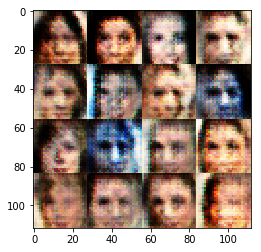

Epoch 0/1... Discriminator Loss: 1.6959... Generator Loss: 1.6403
Epoch 0/1... Discriminator Loss: 0.9565... Generator Loss: 1.8874


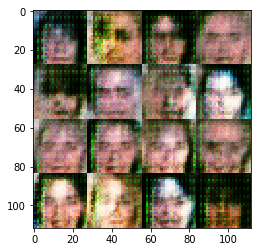

Epoch 0/1... Discriminator Loss: 0.7762... Generator Loss: 1.6332
Epoch 0/1... Discriminator Loss: 0.9902... Generator Loss: 0.6471


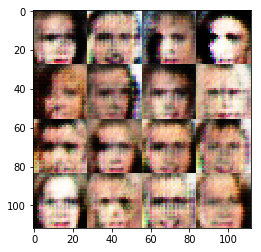

Epoch 0/1... Discriminator Loss: 1.0775... Generator Loss: 0.6818
Epoch 0/1... Discriminator Loss: 1.0928... Generator Loss: 0.9076


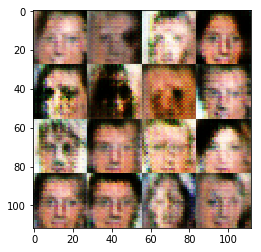

Epoch 0/1... Discriminator Loss: 1.2636... Generator Loss: 0.8888
Epoch 0/1... Discriminator Loss: 1.9158... Generator Loss: 0.1960


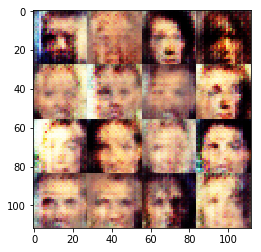

Epoch 0/1... Discriminator Loss: 1.0883... Generator Loss: 0.6902
Epoch 0/1... Discriminator Loss: 1.0772... Generator Loss: 0.6896


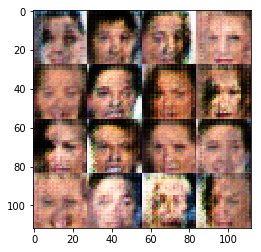

Epoch 0/1... Discriminator Loss: 1.1797... Generator Loss: 0.5554
Epoch 0/1... Discriminator Loss: 1.1049... Generator Loss: 0.9699


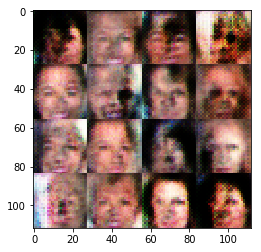

Epoch 0/1... Discriminator Loss: 1.2788... Generator Loss: 2.0408
Epoch 0/1... Discriminator Loss: 0.7399... Generator Loss: 1.1408


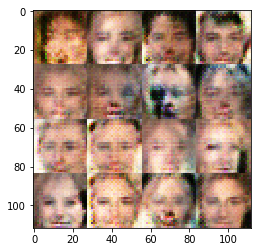

Epoch 0/1... Discriminator Loss: 1.3329... Generator Loss: 0.4466
Epoch 0/1... Discriminator Loss: 0.9657... Generator Loss: 0.9572


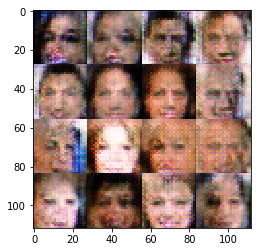

Epoch 0/1... Discriminator Loss: 1.0361... Generator Loss: 0.7271
Epoch 0/1... Discriminator Loss: 1.0897... Generator Loss: 0.8504


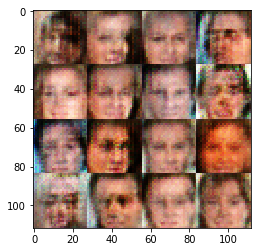

Epoch 0/1... Discriminator Loss: 1.2010... Generator Loss: 1.1790
Epoch 0/1... Discriminator Loss: 1.6883... Generator Loss: 1.1168


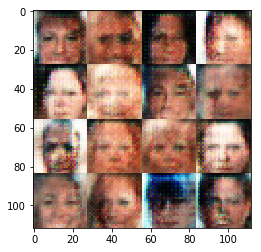

Epoch 0/1... Discriminator Loss: 1.0092... Generator Loss: 0.6636
Epoch 0/1... Discriminator Loss: 1.3417... Generator Loss: 0.5133


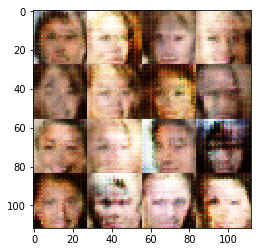

Epoch 0/1... Discriminator Loss: 0.9791... Generator Loss: 0.9111
Epoch 0/1... Discriminator Loss: 0.8803... Generator Loss: 1.1090


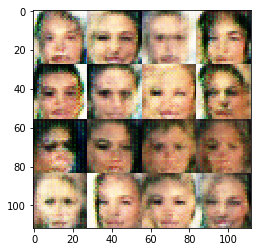

Epoch 0/1... Discriminator Loss: 0.8513... Generator Loss: 1.2366
Epoch 0/1... Discriminator Loss: 0.7197... Generator Loss: 1.5789


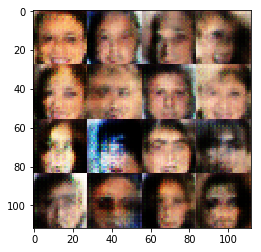

Epoch 0/1... Discriminator Loss: 0.9334... Generator Loss: 0.7907
Epoch 0/1... Discriminator Loss: 1.1299... Generator Loss: 0.5871


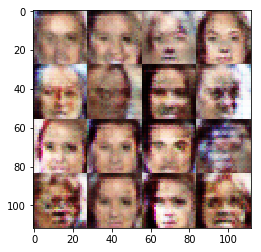

Epoch 0/1... Discriminator Loss: 0.9805... Generator Loss: 1.1100
Epoch 0/1... Discriminator Loss: 1.1180... Generator Loss: 2.0649


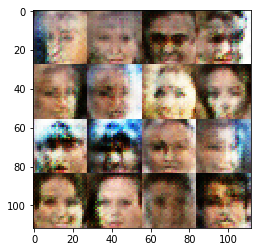

Epoch 0/1... Discriminator Loss: 0.9413... Generator Loss: 0.6843
Epoch 0/1... Discriminator Loss: 1.1723... Generator Loss: 1.0662


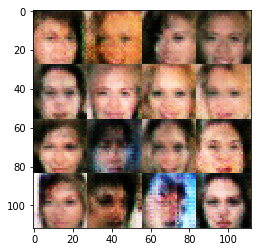

Epoch 0/1... Discriminator Loss: 1.3740... Generator Loss: 0.4719
Epoch 0/1... Discriminator Loss: 1.2226... Generator Loss: 0.7428


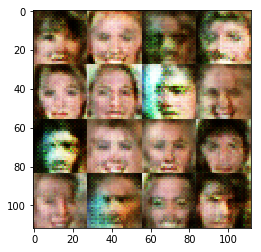

Epoch 0/1... Discriminator Loss: 1.0916... Generator Loss: 1.5043
Epoch 0/1... Discriminator Loss: 1.2517... Generator Loss: 2.0049


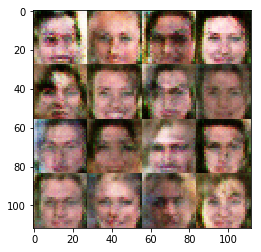

Epoch 0/1... Discriminator Loss: 1.1599... Generator Loss: 0.7082
Epoch 0/1... Discriminator Loss: 1.0402... Generator Loss: 0.8053


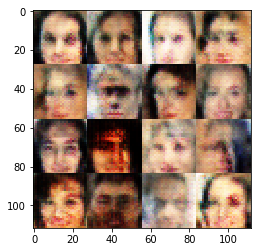

Epoch 0/1... Discriminator Loss: 1.0036... Generator Loss: 0.9750
Epoch 0/1... Discriminator Loss: 0.9274... Generator Loss: 0.9230


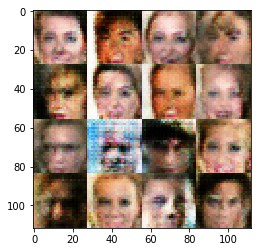

Epoch 0/1... Discriminator Loss: 1.1304... Generator Loss: 1.1508
Epoch 0/1... Discriminator Loss: 0.7811... Generator Loss: 1.4115


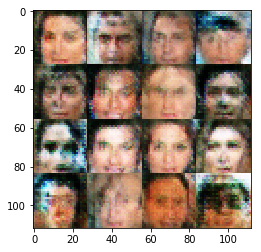

Epoch 0/1... Discriminator Loss: 1.0645... Generator Loss: 0.8931
Epoch 0/1... Discriminator Loss: 1.4299... Generator Loss: 2.5213


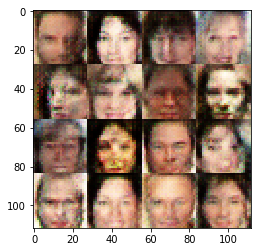

Epoch 0/1... Discriminator Loss: 1.0405... Generator Loss: 0.6912
Epoch 0/1... Discriminator Loss: 1.1746... Generator Loss: 0.6077


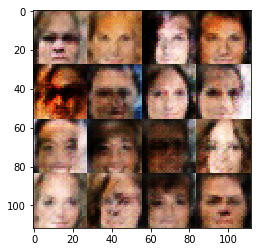

Epoch 0/1... Discriminator Loss: 0.9569... Generator Loss: 2.3023
Epoch 0/1... Discriminator Loss: 0.9257... Generator Loss: 0.9512


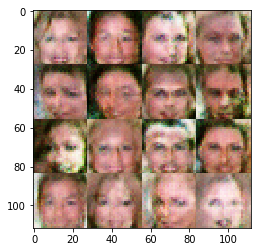

Epoch 0/1... Discriminator Loss: 0.9541... Generator Loss: 0.7513
Epoch 0/1... Discriminator Loss: 0.9034... Generator Loss: 0.9518


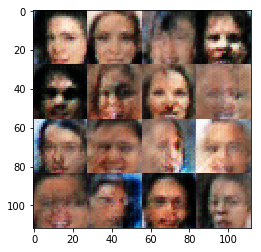

Epoch 0/1... Discriminator Loss: 1.1156... Generator Loss: 0.8511
Epoch 0/1... Discriminator Loss: 0.9349... Generator Loss: 1.1430


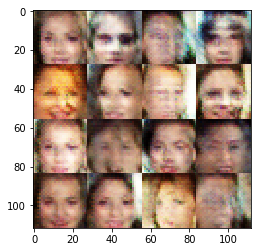

Epoch 0/1... Discriminator Loss: 1.0691... Generator Loss: 0.6279
Epoch 0/1... Discriminator Loss: 1.1409... Generator Loss: 0.9605


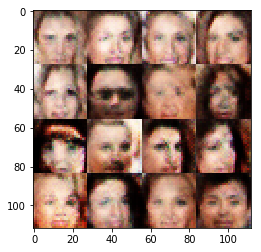

Epoch 0/1... Discriminator Loss: 1.4045... Generator Loss: 0.3858
Epoch 0/1... Discriminator Loss: 1.0732... Generator Loss: 0.7521


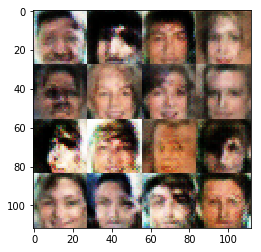

Epoch 0/1... Discriminator Loss: 1.0664... Generator Loss: 0.9785
Epoch 0/1... Discriminator Loss: 1.1484... Generator Loss: 1.4160


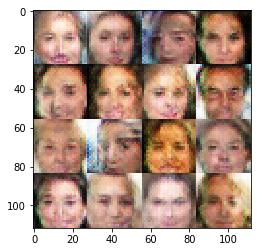

Epoch 0/1... Discriminator Loss: 1.2619... Generator Loss: 0.5863
Epoch 0/1... Discriminator Loss: 0.9650... Generator Loss: 0.9150


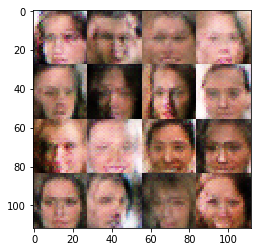

Epoch 0/1... Discriminator Loss: 0.9211... Generator Loss: 1.4288
Epoch 0/1... Discriminator Loss: 0.9854... Generator Loss: 0.7512


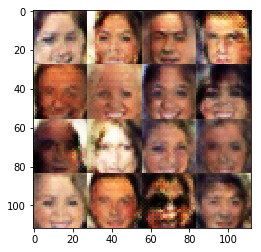

Epoch 0/1... Discriminator Loss: 0.8539... Generator Loss: 0.9985
Epoch 0/1... Discriminator Loss: 0.9036... Generator Loss: 1.0608


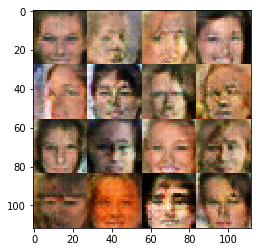

Epoch 0/1... Discriminator Loss: 1.0430... Generator Loss: 0.7103
Epoch 0/1... Discriminator Loss: 0.8404... Generator Loss: 0.9762


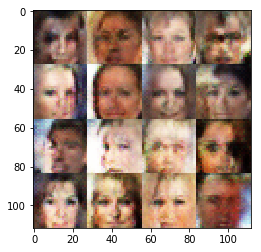

Epoch 0/1... Discriminator Loss: 1.2528... Generator Loss: 0.5786
Epoch 0/1... Discriminator Loss: 1.2818... Generator Loss: 0.4568


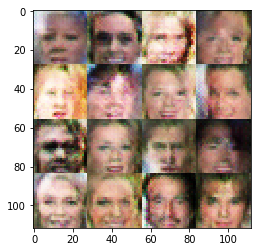

Epoch 0/1... Discriminator Loss: 1.0006... Generator Loss: 0.8900
Epoch 0/1... Discriminator Loss: 1.3815... Generator Loss: 0.3886


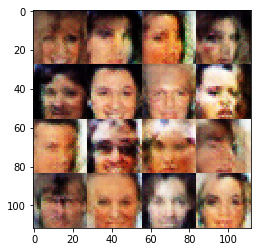

Epoch 0/1... Discriminator Loss: 1.2679... Generator Loss: 0.5873
Epoch 0/1... Discriminator Loss: 0.9585... Generator Loss: 0.9575


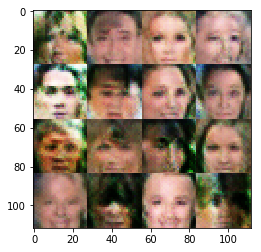

Epoch 0/1... Discriminator Loss: 1.2240... Generator Loss: 0.7966
Epoch 0/1... Discriminator Loss: 0.8579... Generator Loss: 1.4551


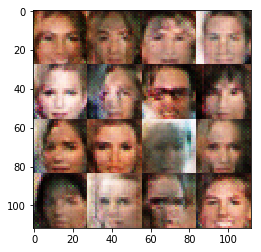

Epoch 0/1... Discriminator Loss: 1.3028... Generator Loss: 0.5394
Epoch 0/1... Discriminator Loss: 1.1112... Generator Loss: 0.7762


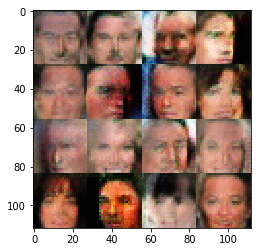

Epoch 0/1... Discriminator Loss: 1.1230... Generator Loss: 0.9227
Epoch 0/1... Discriminator Loss: 1.2362... Generator Loss: 0.5178


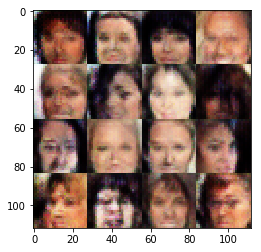

Epoch 0/1... Discriminator Loss: 1.0913... Generator Loss: 0.7929
Epoch 0/1... Discriminator Loss: 0.8596... Generator Loss: 0.9705


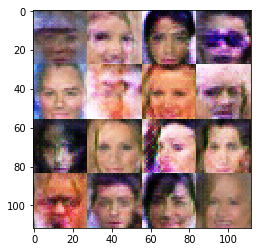

Epoch 0/1... Discriminator Loss: 1.1329... Generator Loss: 0.6999
Epoch 0/1... Discriminator Loss: 1.0311... Generator Loss: 0.8163


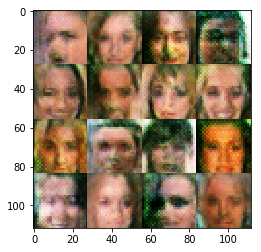

Epoch 0/1... Discriminator Loss: 0.8289... Generator Loss: 1.1358
Epoch 0/1... Discriminator Loss: 1.2079... Generator Loss: 0.5730


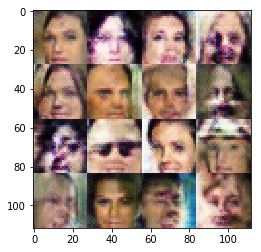

Epoch 0/1... Discriminator Loss: 0.9879... Generator Loss: 0.7466


In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.